# Depth based outlier detection

### Data loading and preparation

In [1]:
%pylab
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
abalone_data = pd.read_csv("abalone_dataset.csv")

In [3]:
abalone_data.dtypes

sex                object
length            float64
diameter          float64
height            float64
weight_whole      float64
weight_shucked    float64
weight_viscera    float64
weight_shell      float64
rings               int64
dtype: object

In [4]:
abalone_data.head()

,sex,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
abalone_data_mf = abalone_data[abalone_data.sex != 'I']

In [6]:
abalone_data_mf.head()

,sex,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [7]:
abalone_data_mf = abalone_data.drop('sex',axis = 1)

In [8]:
abalone_data_mf.head()

,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Implementation

In [9]:
def depth_outliers(points):
    depth = list()
    dataset = points
    while len(dataset) > 0:
        if len(dataset) > 2:
            hull = ConvexHull(dataset)
            hv = hull.vertices
        else:
            hv = range(len(dataset))
        depth.append(dataset[hv])
        dataset = array([ dataset[i] for i in range(len(dataset)) if i not in hv])
    return depth

Layers:  9


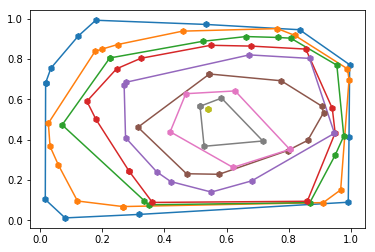

In [10]:
points = np.random.rand(80, 2)
depth_set = depth_outliers(points)

print "Layers: ", len(depth_set)

for dd in depth_set:
    dd2 = np.append(dd,[dd[0]],axis=0)
    plot(dd2[:,0], dd2[:,1], 'h-')

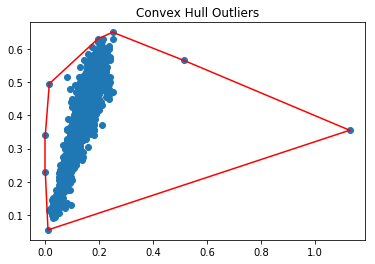

In [52]:
points = abalone_data[["height", "diameter"]].values
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
    
plt.title('Convex Hull Outliers')
plt.draw()
plt.savefig("convex1.png",dpi=100)
plt.show()

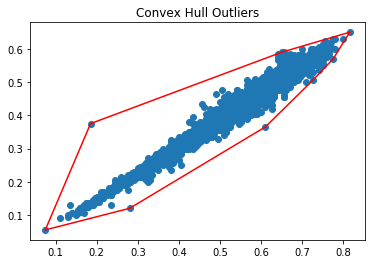

In [15]:
points = abalone_data[["length", "diameter"]].values
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
    
plt.title('Convex Hull Outliers')
plt.draw()
plt.savefig("convex2.png",dpi=100)
plt.show()

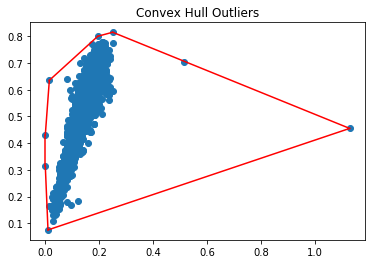

In [16]:
points = abalone_data[["height", "length"]].values
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
    
plt.title('Convex Hull Outliers')
plt.draw()
plt.savefig("convex3.png",dpi=100)
plt.show()

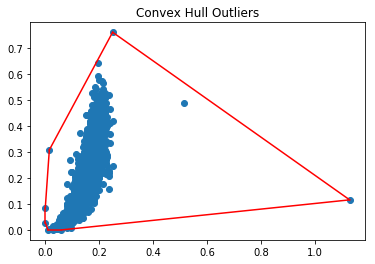

In [17]:
points = abalone_data[["height", "weight_viscera"]].values
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
    
plt.title('Convex Hull Outliers')
plt.draw()
plt.savefig("convex4.png",dpi=100)
plt.show()

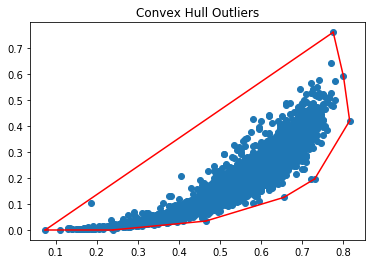

In [18]:
points = abalone_data[["length", "weight_viscera"]].values
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
    
plt.title('Convex Hull Outliers')
plt.draw()
plt.savefig("convex5.png",dpi=100)
plt.show()

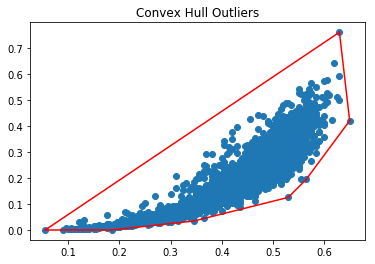

In [19]:
points = abalone_data[["diameter", "weight_viscera"]].values
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
    
plt.title('Convex Hull Outliers')
plt.draw()
plt.savefig("convex6.png",dpi=100)
plt.show()

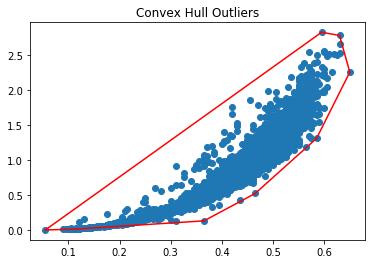

In [20]:
points = abalone_data[["diameter", "weight_whole"]].values
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
    
plt.title('Convex Hull Outliers')
plt.draw()
plt.savefig("convex7.png",dpi=100)
plt.show()

In [21]:
import time

In [22]:
%%time

points = abalone_data_mf.values
depth_set = depth_outliers(points)

print "Layers: ", len(depth_set)

Layers:  6
Wall time: 4min 7s


In [23]:
depth_set[1]

array([[ 0.455 ,  0.365 ,  0.095 , ...,  0.101 ,  0.15  , 15.    ],
       [ 0.53  ,  0.415 ,  0.15  , ...,  0.1415,  0.33  , 20.    ],
       [ 0.545 ,  0.425 ,  0.125 , ...,  0.1495,  0.26  , 16.    ],
       ...,
       [ 0.44  ,  0.35  ,  0.11  , ...,  0.0895,  0.115 ,  6.    ],
       [ 0.39  ,  0.31  ,  0.085 , ...,  0.0695,  0.079 ,  7.    ],
       [ 0.6   ,  0.475 ,  0.205 , ...,  0.2875,  0.308 ,  9.    ]])

In [24]:
print len(depth_set[0])
print len(depth_set[1])
print len(depth_set[2])
print len(depth_set[3])
print len(depth_set[4])
print len(depth_set[5])

504
1292
1415
748
209
9


In [25]:
sduz = ConvexHull(points)

In [26]:
len(sduz.vertices)

504

In [27]:
sduz.vertices

array([  10,   14,   16,   31,   32,   43,   46,   81,   85,  109,  113,
        125,  128,  129,  149,  159,  163,  164,  165,  166,  168,  169,
        170,  174,  176,  177,  178,  181,  186,  192,  215,  224,  236,
        238,  239,  246,  270,  274,  288,  294,  297,  305,  306,  307,
        308,  310,  312,  313,  314,  318,  323,  332,  334,  351,  355,
        358,  365,  372,  373,  374,  379,  407,  417,  418,  419,  423,
        427,  428,  433,  434,  437,  443,  445,  446,  452,  454,  464,
        465,  478,  480,  481,  495,  496,  501,  510,  514,  517,  518,
        520,  523,  524,  525,  526,  542,  546,  547,  565,  567,  608,
        609,  611,  613,  619,  623,  634,  635,  645,  646,  647,  664,
        665,  673,  674,  675,  678,  679,  687,  694,  695,  696,  699,
        709,  719,  720,  725,  729,  746,  747,  749,  750,  752,  753,
        756,  759,  760,  762,  770,  773,  775,  788,  789,  790,  801,
        811,  818,  822,  831,  860,  882,  885,  8

In [28]:
import pickle

with open("depth_out.txt", "wb") as fp:   #Pickling
    pickle.dump(sduz.vertices, fp)

with open("depth_out.txt", "rb") as fp:   # Unpickling
    vertici = pickle.load(fp)

In [29]:
len(vertici)

504

In [30]:
depth_set[0]

array([[ 0.525 ,  0.38  ,  0.14  , ...,  0.1475,  0.21  , 14.    ],
       [ 0.47  ,  0.355 ,  0.1   , ...,  0.0805,  0.185 , 10.    ],
       [ 0.355 ,  0.28  ,  0.085 , ...,  0.0395,  0.115 ,  7.    ],
       ...,
       [ 0.67  ,  0.525 ,  0.2   , ...,  0.297 ,  0.657 , 11.    ],
       [ 0.77  ,  0.605 ,  0.175 , ...,  0.526 ,  0.355 , 11.    ],
       [ 0.35  ,  0.25  ,  0.075 , ...,  0.0355,  0.041 ,  6.    ]])

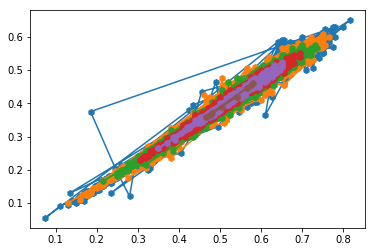

In [54]:
for dd in depth_set:
    dd2 = np.append(dd,[dd[0]],axis=0)
    plot(dd2[:,0], dd2[:,1], 'h-')
    

plt.draw()
plt.savefig("convex8.png",dpi=100)
plt.show()

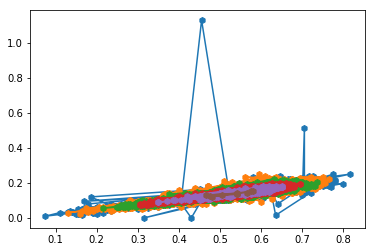

In [55]:
for dd in depth_set:
    dd2 = np.append(dd,[dd[0]],axis=0)
    plot(dd2[:,0], dd2[:,2], 'h-')

plt.draw()
plt.savefig("convex9.png",dpi=100)
plt.show()

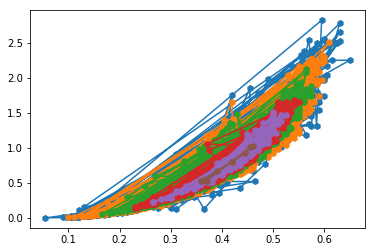

In [56]:
for dd in depth_set:
    dd2 = np.append(dd,[dd[0]],axis=0)
    plot(dd2[:,1], dd2[:,3], 'h-')

plt.draw()
plt.savefig("convex10.png",dpi=100)
plt.show()

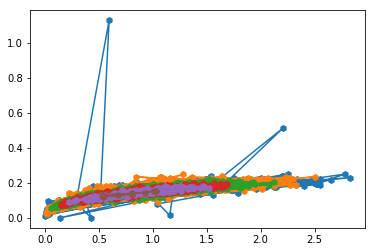

In [57]:
for dd in depth_set:
    dd2 = np.append(dd,[dd[0]],axis=0)
    plot(dd2[:,3], dd2[:,2], 'h-')
plt.draw()
plt.savefig("convex11.png",dpi=100)
plt.show()

In [35]:
import pandas as pd
import numpy as np

In [36]:
outliers_lof = pd.read_csv('outliers_lof.csv', index_col = 0)

In [37]:
outliers_lof

,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings,outliers
236,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1,-1
237,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3,-1
238,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3,-1
306,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3,-1
480,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.4750,29,-1
520,0.210,0.150,0.050,0.0385,0.0155,0.0085,0.0100,3,-1
526,0.155,0.110,0.040,0.0155,0.0065,0.0030,0.0050,3,-1
719,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2,-1
720,0.160,0.110,0.025,0.0180,0.0065,0.0055,0.0050,3,-1
860,0.595,0.475,0.160,1.1405,0.5470,0.2310,0.2710,6,-1


In [38]:
outliers_dbscan = pd.read_csv('outliers_dbscan.csv', index_col = 0)

In [39]:
outliers_dbscan

,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings,dbscan_label
129,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.7800,18,-1
163,0.725,0.560,0.210,2.1410,0.6500,0.3980,1.0050,18,-1
165,0.725,0.570,0.190,2.5500,1.0705,0.4830,0.7250,14,-1
166,0.725,0.575,0.175,2.1240,0.7650,0.4515,0.8500,20,-1
167,0.680,0.570,0.205,1.8420,0.6250,0.4080,0.6500,20,-1
232,0.625,0.505,0.215,1.4455,0.4960,0.2870,0.4350,22,-1
236,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1,-1
270,0.640,0.525,0.215,1.7790,0.4535,0.2855,0.5500,22,-1
275,0.655,0.540,0.215,1.8440,0.7425,0.3270,0.5850,22,-1
294,0.600,0.495,0.195,1.0575,0.3840,0.1900,0.3750,26,-1


In [40]:
lof_indexes = outliers_lof.index.tolist()

In [41]:
dbscan_indexes = outliers_dbscan.index.tolist()

In [42]:
len(lof_indexes), len(dbscan_indexes)

(42, 44)

In [43]:
for i in set(lof_indexes).intersection(set(dbscan_indexes)):
    print i

480
2051
2811
236
719
1426
1039


In [44]:
lof_indexes

[236L,
 237L,
 238L,
 306L,
 480L,
 520L,
 526L,
 719L,
 720L,
 860L,
 894L,
 1039L,
 1044L,
 1054L,
 1210L,
 1216L,
 1228L,
 1264L,
 1426L,
 1429L,
 1755L,
 2051L,
 2115L,
 2123L,
 2127L,
 2371L,
 2619L,
 2627L,
 2641L,
 2711L,
 2728L,
 2790L,
 2811L,
 2975L,
 3086L,
 3472L,
 3521L,
 3716L,
 3718L,
 3801L,
 3814L,
 3996L]

In [45]:
dbscan_indexes

[129L,
 163L,
 165L,
 166L,
 167L,
 232L,
 236L,
 270L,
 275L,
 294L,
 313L,
 314L,
 351L,
 355L,
 358L,
 433L,
 480L,
 501L,
 673L,
 674L,
 675L,
 678L,
 719L,
 811L,
 882L,
 891L,
 1039L,
 1426L,
 1427L,
 1763L,
 2051L,
 2108L,
 2161L,
 2201L,
 2209L,
 2305L,
 2334L,
 2335L,
 2436L,
 2811L,
 3007L,
 3149L,
 3280L,
 3427L]

In [46]:
import pickle
with open("depth_out.txt", "rb") as fp:   # Unpickling
    depth_indexes = pickle.load(fp)

In [47]:
len(depth_indexes)

504

In [48]:
len(set(depth_indexes).intersection(set(dbscan_indexes)))

39

In [49]:
len(set(depth_indexes).intersection(set(lof_indexes)))

36

In [50]:
set(set(lof_indexes).intersection(set(dbscan_indexes))).intersection(set(dbscan_indexes))

{236L, 480L, 719L, 1039L, 1426L, 2051L, 2811L}